# Autonomous Driving part 2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/capstone data/Tesla - Deaths.csv")

In [ ]:
data.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(307, 24)

## Checking for data types and missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                294 non-null    float64
 1   Year                                                                  294 non-null    float64
 2   Date                                                                  294 non-null    object 
 3    Country                                                              294 non-null    object 
 4    State                                                                294 non-null    object 
 5    Description                                                          295 non-null    object 
 6    Deaths                                                               299 non-null    float64
 7  

In [ ]:
data.describe()

,Case #,Year,Deaths,Deceased 4
count,294.000000,294.000000,299.000000,0.0
mean,147.500000,2013.850340,10.284281,NaN
std,85.014705,106.050207,119.032014,NaN
min,1.000000,202.000000,1.000000,NaN
25%,74.250000,2019.000000,1.000000,NaN
50%,147.500000,2021.000000,1.000000,NaN
75%,220.750000,2022.000000,1.000000,NaN
max,294.000000,2022.000000,2013.000000,NaN


In [ ]:
data.isna().sum()

,0
Case #,13
Year,13
Date,13
Country,13
State,13
Description,12
Deaths,8
Tesla driver,13
Tesla occupant,17
Other vehicle,12


In [ ]:
data.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ',
       ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 '],
      dtype='object')

## Droping non_essential columns

In [ ]:
drop_colms=['Case #', 'Year','Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ',
       ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 ',' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ']

data.drop(columns= drop_colms, inplace= True)

In [ ]:
data

,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths
0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-
1,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-
2,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-
3,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-
4,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing value treatment

In [ ]:
cols= data.columns[5:]
for col in cols:
  if col != ' Model ':
    print(col)
    data[col]=data[col].fillna("-").astype(str)
    data[col]=data[col].str.strip()
    data[col]=data[col].replace("-", "0")
    data[col]=data[col].astype(int)
    print(data[col].unique())

 Tesla driver 
[   1    0   28   89  117    6 2014]
 Tesla occupant 
[   0    1    3    2    7   41   48    5 2015]
 Other vehicle 
[   0    1    2    3    4   29  101  130   16 2016]
 Cyclists/ Peds 
[   0    1    2   20   26   46   11 2017]
 TSLA+cycl / peds 
[   1    0    2    3    4   61  149  210   21 2018]
 Autopilot claimed 
[   0    1    2    8   30   38   47 2020]
 Verified Tesla Autopilot Deaths 
[   0    1    2    3   16   19  118 2022   75 2021]


In [ ]:
data.isna().sum()

,0
Date,13
Country,13
State,13
Description,12
Deaths,8
Tesla driver,0
Tesla occupant,0
Other vehicle,0
Cyclists/ Peds,0
TSLA+cycl / peds,0


In [ ]:
data.dropna(inplace= True)

In [ ]:
data.isna().sum()


,0
Date,0
Country,0
State,0
Description,0
Deaths,0
Tesla driver,0
Tesla occupant,0
Other vehicle,0
Cyclists/ Peds,0
TSLA+cycl / peds,0


## Removing spaces and special charecters from the column names

In [ ]:
data.columns = data.columns.str.strip()
data.columns

Index(['Date', 'Country', 'State', 'Description', 'Deaths', 'Tesla driver',
       'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds',
       'Model', 'Autopilot claimed', 'Verified Tesla Autopilot Deaths'],
      dtype='object')

In [ ]:
data.columns= data.columns.str.replace(" ","", regex= True).str.replace("[+/]","_", regex= True)

In [ ]:
data.columns

Index(['Date', 'Country', 'State', 'Description', 'Deaths', 'Tesladriver',
       'Teslaoccupant', 'Othervehicle', 'Cyclists_Peds', 'TSLA_cycl_peds',
       'Model', 'Autopilotclaimed', 'VerifiedTeslaAutopilotDeaths'],
      dtype='object')

## Changing variable names according to python syntax

In [ ]:
data.rename(columns={'Autopilotclaimed': 'Claimed', 'VerifiedTeslaAutopilotDeaths':'VTAD',
                      "Teslaoccupant" : "Tesla_Occupant", "Othervehicle":'Other_Vehicle',
                     "Tesladriver": "Tesla_Driver",
                     }, inplace = True )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            294 non-null    object 
 1   Country         294 non-null    object 
 2   State           294 non-null    object 
 3   Description     294 non-null    object 
 4   Deaths          294 non-null    float64
 5   Tesla_Driver    294 non-null    int64  
 6   Tesla_Occupant  294 non-null    int64  
 7   Other_Vehicle   294 non-null    int64  
 8   Cyclists_Peds   294 non-null    int64  
 9   TSLA_cycl_peds  294 non-null    int64  
 10  Model           294 non-null    object 
 11  Claimed         294 non-null    int64  
 12  VTAD            294 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 32.2+ KB


## Exploratory Data Analysis

### Analysing the no. of events by date, year, month for each state and country

In [ ]:
data.Date= pd.to_datetime(data.Date)

In [ ]:
data.loc[:, "event_year"]= data.Date.dt.year
data.loc[:,"event_month"] = data.Date.dt.month
data.loc[:,"event_day"] = data.Date.dt.day

In [ ]:
data= data[data.event_year!= 2023]

In [ ]:
vc = data.event_year.value_counts()
vc = vc.sort_index()
vc

,count
event_year,
2013,2
2014,4
2015,5
2016,15
2017,11
2018,18
2019,46
2020,39
2021,58


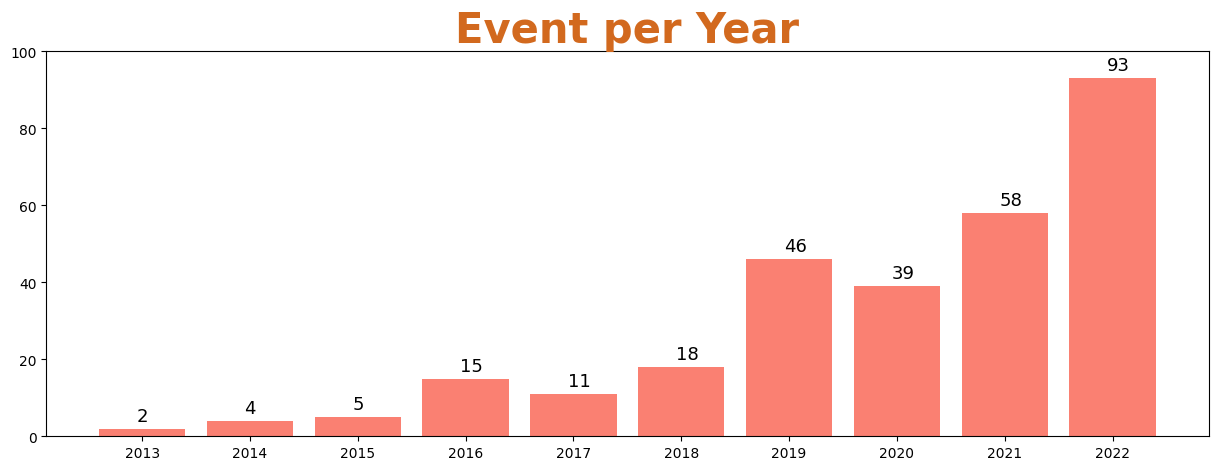

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(height = vc.values, x = vc.index, color = "salmon")
plt.xticks(vc.index, vc.index)
for i in vc.index:
  plt.annotate(vc[i], xy = (i-0.05, vc[i]+2), size = 13)
plt.ylim(0,100)
plt.title("Event per Year", size = 30, color = "chocolate", weight = "heavy")
plt.show()

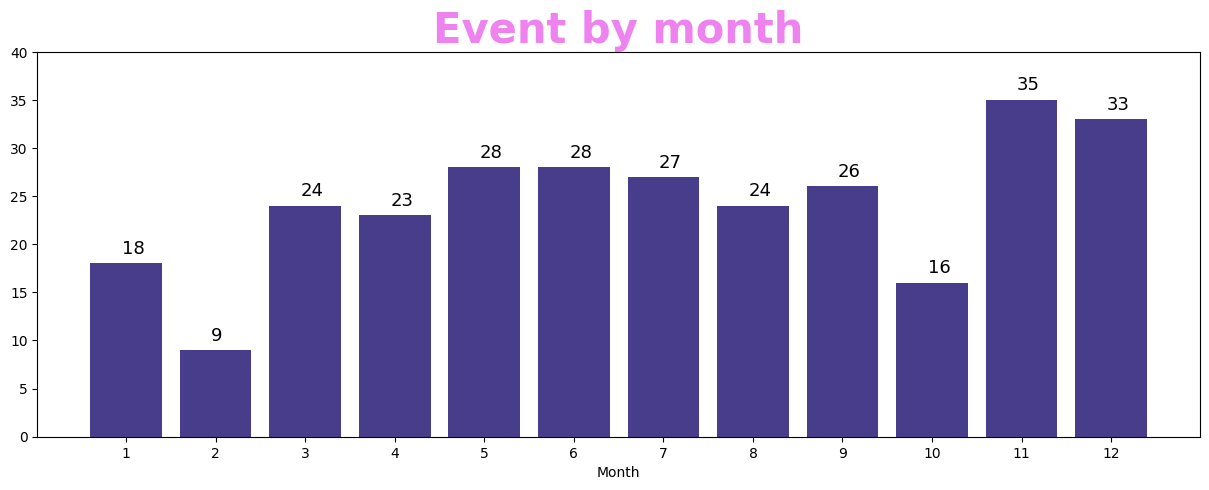

In [ ]:
vc = data.event_month.value_counts()
vc = vc.sort_index()
plt.figure(figsize = (15,5))
plt.bar(height = vc.values, x = vc.index, color = "darkslateblue")
plt.xticks(vc.index, vc.index)
for i in vc.index:
  plt.annotate(vc[i], xy = (i-0.05, vc[i]+1), size = 13)
plt.ylim(0, 5 * round(vc.max()/5) +5)
plt.xlabel("Month")
plt.title("Event by month", size = 30, color = "violet",weight = "heavy")
plt.show()

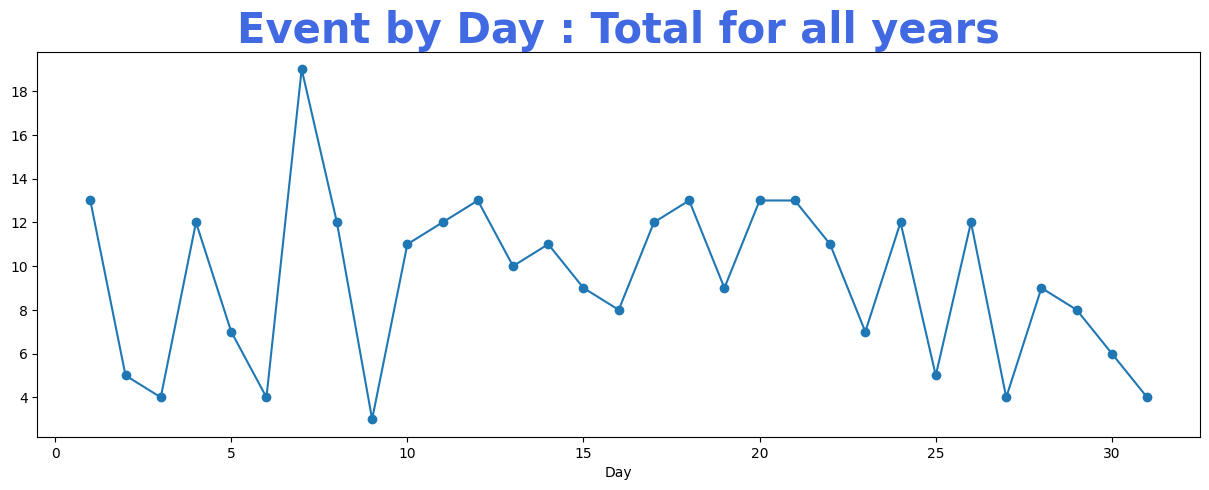

In [ ]:
vc = data.event_day.value_counts()
vc = vc.sort_index()
plt.figure(figsize = (15,5))
plt.plot( vc.index, vc.values)
plt.scatter( vc.index, vc.values)
plt.xlabel("Day")
plt.title("Event by Day : Total for all years", size = 30, color = "royalblue",weight = "heavy")
plt.show()

## Conclusion:
    

*   Tesla's accidents tends to increase every year
*   The no. of accidents in Nov and Dec is the highest
*   Day wise no concrete info as the distribution is irregular

However for year wise pattern we should be considering the accidents vs sales data. More Tesla on road will definetly bring a rise in no. of accidents while proportion of accidents might not increase as such.





<ipython-input-28-acbf0f8a016a>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(vc[i], xy = (i-0.1, vc[i]+2), size = 10)


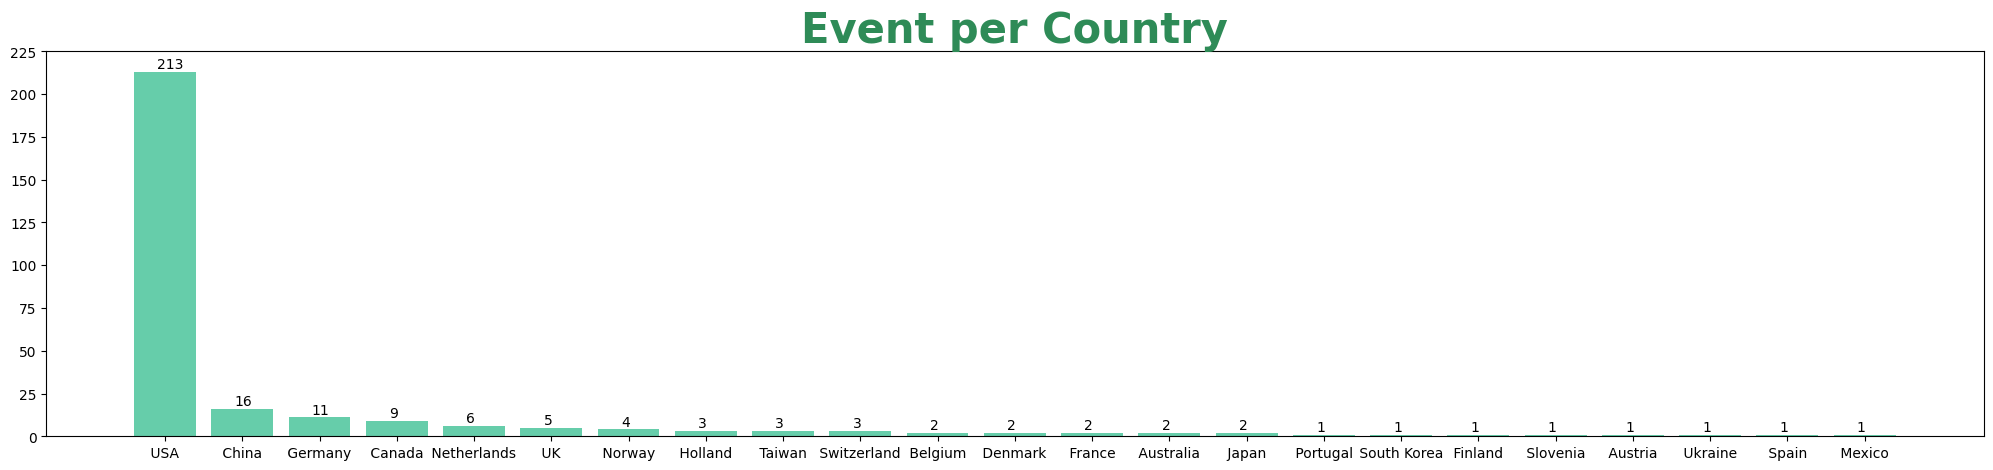

In [ ]:
vc = data.Country.value_counts()
plt.figure(figsize = (25,5))
plt.bar(height = vc.values, x = vc.index, color = "mediumaquamarine")
plt.xticks(vc.index, vc.index)
for i in range(len(vc.index)):
  plt.annotate(vc[i], xy = (i-0.1, vc[i]+2), size = 10)
plt.title("Event per Country", size = 30, color = "seagreen", weight = "heavy")
plt.ylim(0, 25 * round(vc.max()/25))
plt.show()

In [ ]:
data.State = data.State.str.strip()

<ipython-input-29-8130ec4900f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.State = data.State.str.strip()


<ipython-input-30-f06dd1bf7356>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(vc[i], xy = (i-0.1, vc[i]+2), size = 10)


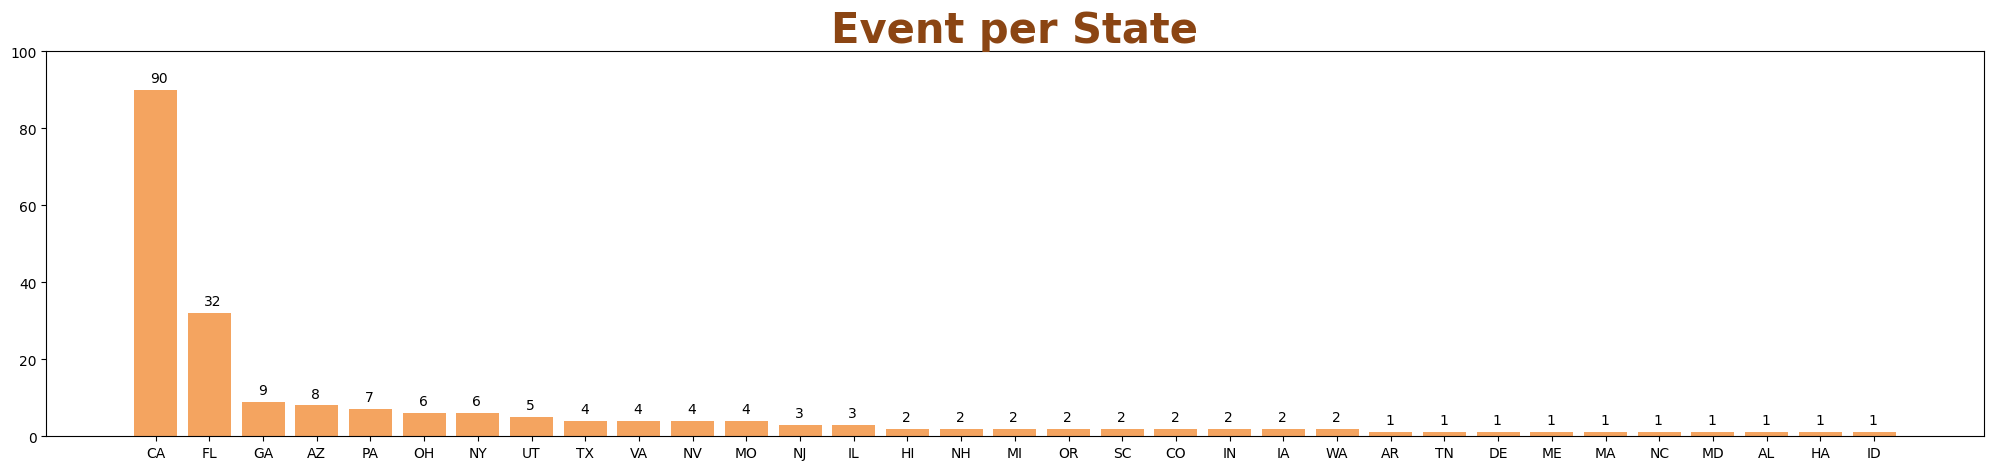

In [ ]:
vc = data.State.value_counts()
vc = vc[vc.index != "-"]
plt.figure(figsize = (25,5))
plt.bar(height = vc.values, x = vc.index, color = "sandybrown")
plt.xticks(vc.index, vc.index)
for i in range(len(vc.index)):
  plt.annotate(vc[i], xy = (i-0.1, vc[i]+2), size = 10)
plt.title("Event per State", size = 30, color = "saddlebrown", weight = "heavy")
plt.ylim(0, 25 * round(vc.max()/25))
plt.show()

##Analyzing the different aspects of the death events. For example:
*   What is the number of victims (deaths) in each accident?
*   How many times did tesla drivers die?
*   What is the proportion of events in which one or more occupants died?
*   What is the distribution of events in which the vehicle hit a cyclist or a
    pedestrian?
*   How many times did the accident involve the death of an occupant or driver
    of a Tesla along with a cyclist or pedestrian?
*   What is the frequency of Tesla colliding with other vehicles?





In [ ]:
col_list = ['Deaths','Tesla_Driver','Tesla_Occupant', 'Other_Vehicle', 'Cyclists_Peds', 'TSLA_cycl_peds']

In [ ]:
colr = ['salmon', 'mediumaquamarine', 'mediumpurple', 'goldenrod', 'silver', 'saddlebrown']

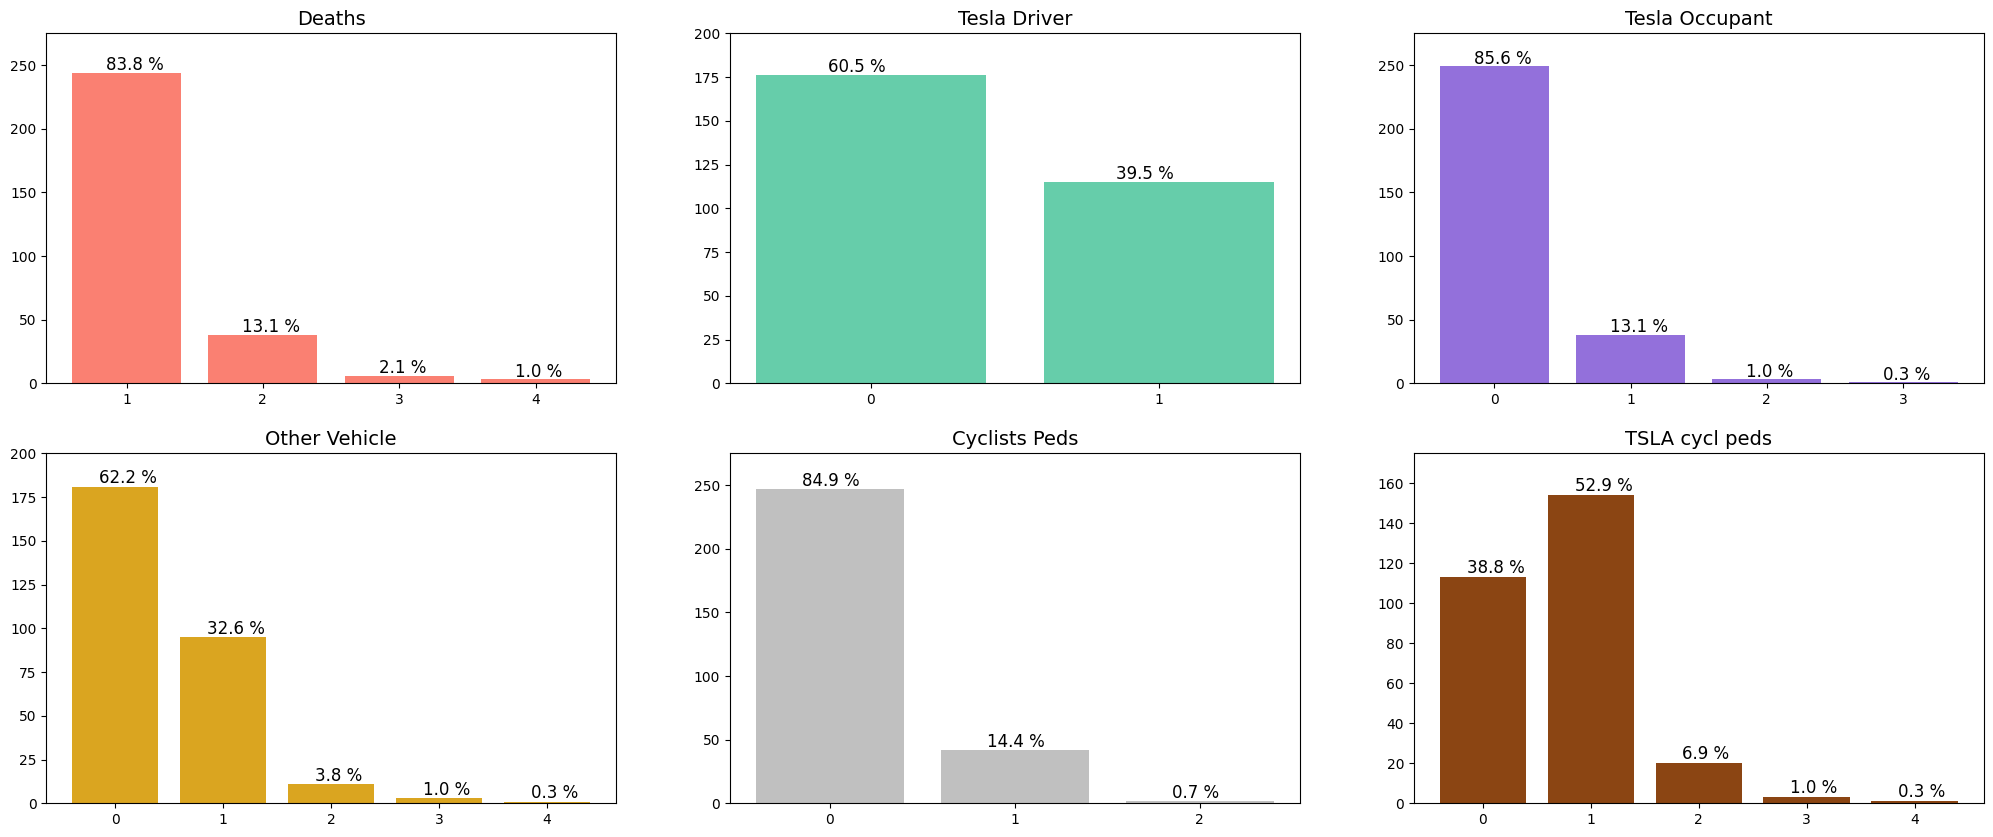

In [ ]:
f,ax = plt.subplots(2,3, figsize = (25,10))
i,j,k = 0,0,0
for col in col_list:
  vc = data[col].value_counts()
  vc = vc.sort_index()
  perc = (vc/vc.sum()*100).round(1)
  #print(vc)
  ax[i,j].bar(x = vc.index, height = vc.values, color = colr[k])
  ax[i,j].set_title(col.replace("_", " "), size = 14)
  ax[i,j].set_xticks(vc.index)
  for l in vc.index:
    #print(l)
    ax[i,j].annotate("{} %".format(perc[l]), xy = (l-0.15,vc[l]+2), size = 12)
    ax[i,j].set_ylim(0,  25 * round(vc.max()/25)+25)
  j += 1
  k += 1
  if j == 3:
    j = 0
    i += 1

## Study the event distribution across models

In [ ]:
data.loc[:, 'Model'] = data['Model'].str.strip()
data.loc[:, 'Model'] = data['Model'].replace("-", "0")

<ipython-input-36-4289dc5be28c>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(vc[i], xy = (i-0.05, vc[i]+1), size = 13)


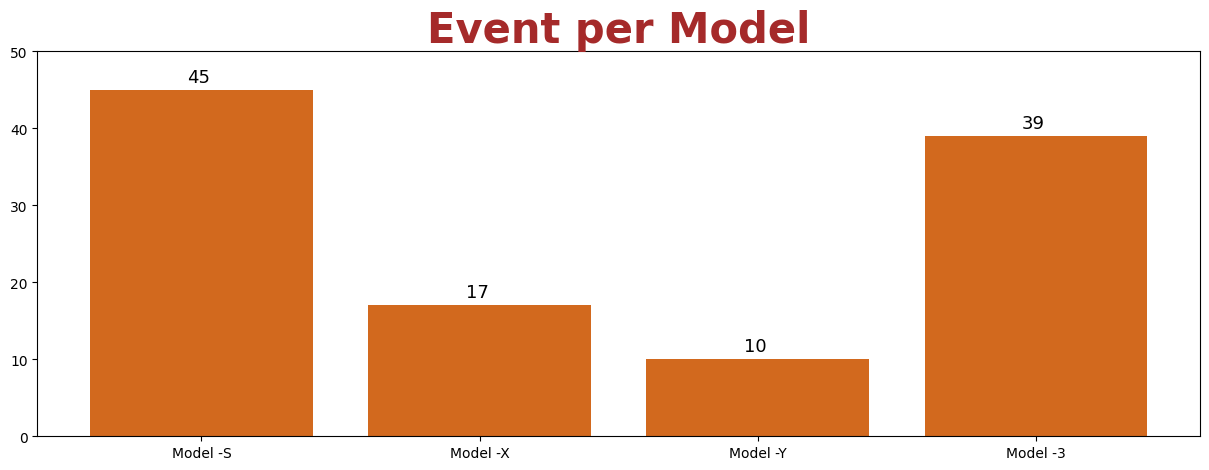

In [ ]:
vc = data.Model.value_counts()
vc = vc[["S", "X", "Y", "3"]]
plt.figure(figsize = (15,5))
plt.bar(height = vc.values, x = vc.index, color = "chocolate")
plt.xticks(vc.index, "Model -"+ vc.index.astype(str))
for i in range(len(vc.index)):
  plt.annotate(vc[i], xy = (i-0.05, vc[i]+1), size = 13)
plt.title("Event per Model", size = 30, color = "brown", weight = "heavy")
plt.ylim(0, 25 * round(vc.max()/25))
plt.show()

## Checking the distribution of verified tesla autopilot deaths

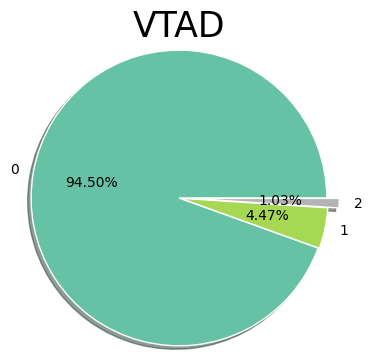

In [ ]:
vc = data.VTAD.value_counts()
plt.figure(figsize = (4,4))
vc.plot.pie(radius = 1.2, autopct = "%1.2f%%", shadow = True, wedgeprops = {'edgecolor':"white"}, cmap = 'Set2',
            explode = [0.001, 0.01,0.1])
plt.ylabel("")
plt.title("VTAD", pad = 5, size = 25)
plt.show()